### Numpy basics

In [138]:
import numpy as np

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [139]:
m = np.arange(12).reshape((3,4))

for i, row in enumerate(m):
    print(f'The {i}-th row is {row}\n its mean is {row.mean()}')
print()
for i, col in enumerate(m.transpose()):
    print(f'The {i}-th col is {col}\n its mean is {col.mean()}')

The 0-th row is [0 1 2 3]
 its mean is 1.5
The 1-th row is [4 5 6 7]
 its mean is 5.5
The 2-th row is [ 8  9 10 11]
 its mean is 9.5

The 0-th col is [0 4 8]
 its mean is 4.0
The 1-th col is [1 5 9]
 its mean is 5.0
The 2-th col is [ 2  6 10]
 its mean is 6.0
The 3-th col is [ 3  7 11]
 its mean is 7.0


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [140]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print("Using numpy's outer product:")
op = np.outer(u,v)
print(f'{op}')
print()
print("Using a list comprehension:")
op = np.array([h*v for h in u])
print(op)
print()
print("Using broadcasting operations:")
op = u.reshape(4,1)*v
print(op)

Using numpy's outer product:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Using a list comprehension:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Using broadcasting operations:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [141]:
import numpy.random as npr
m = npr.random([10,6])
print(f'The original matrix is:\n{m}\n')
# we review if theres any lower than zero each row (axis 1)
g = np.any(m<0.1,axis = 1)
# Then overwrite any such term
m[g>0]=np.zeros(6)
print(f'Thus, the resulting matrix is:\n{m}')

The original matrix is:
[[0.70064438 0.21849276 0.44427088 0.00291284 0.29938541 0.0736194 ]
 [0.02864545 0.88347316 0.93545783 0.43543535 0.82971523 0.78922261]
 [0.01251692 0.27054536 0.32241668 0.12203367 0.32782068 0.55257792]
 [0.70998027 0.9874526  0.21226022 0.69785169 0.55972986 0.24487125]
 [0.11944923 0.68036412 0.16523714 0.18083509 0.53318589 0.62372376]
 [0.71739168 0.04422138 0.78127189 0.8845556  0.15772993 0.5023035 ]
 [0.14161896 0.03501621 0.21398116 0.47348368 0.56474469 0.55738372]
 [0.69682252 0.74048165 0.76637866 0.24822153 0.52142905 0.38858982]
 [0.57605771 0.9726473  0.10199624 0.02196703 0.95226547 0.9015086 ]
 [0.44800341 0.0981049  0.79141273 0.71925057 0.49343314 0.85934819]]

Thus, the resulting matrix is:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.70998027 0.9874526  0.21226022 0.69785169 

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

The original array is:
[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158

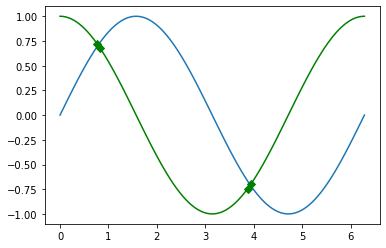

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0,2*np.pi,100)
y_1 = np.sin(x)
y_2 = np.cos(x)
print(f'The original array is:\n{x}\n')

every_tenth = [i for i in range(9,100,10)] 
print(f'This is the array of every tenth element:\n{x[every_tenth]}\n')

reversed_x = x[::-1]
print(f'The reversed array is:\n{reversed_x}\n')

close_at = x[abs(np.cos(x)-np.sin(x))<0.1]
print(f'Every x_i in the range such that sin(x) and cos(x) are near:\n{close_at}\n')
plt.plot(x,y_1)
plt.plot(x,y_2, '-gD', markevery = np.where(abs(np.cos(x)-np.sin(x))<0.1)[0].tolist())

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [143]:
# We obtain the 10 by 10 multiplication table 
# by means of the outer product of an array
# with the first 10 numbers with itselt.
a = np.arange(1,11)
mult = np.outer(a,a)
print(f'The multiplication table is:\n{mult}\n')

trace = np.trace(mult)
print(f'Its trace is: {trace}\n')

#antdiagonl = np.array([mult[i,10-i-1] for i in range(10)])
antdiagonal = np.fliplr(mult).diagonal()
print(f'Its antidiagonal is\n{antdiagonal}\n')

# We obtain the offset diagonal by extracting a submatrix
offset = 1
off_diag = mult[:-offset,offset:].diagonal()
print(f'The 1 upwards offset diagonal is\n{off_diag}')

The multiplication table is:
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

Its trace is: 385

Its antidiagonal is
[10 18 24 28 30 30 28 24 18 10]

The 1 upwards offset diagonal is
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [144]:
a = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
b= np.tile(a,len(a)).reshape([a.size,a.size])
grid = abs(b - b.T)
print(f'The distances between cities is given by:\n{grid}\n')
print(f'In readable units (km):\n{1.609*grid}')

The distances between cities is given by:
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

In readable units (km):
[[   0.     318.582  487.527 1184.224 1401.439 1890.575 2373.275 2484.296
  3078.017 3938.832]
 [ 318.582    0.     168.945  865.642 1082.857 1571.993 2054.693 2165.714
  2759.435 3620.25 ]
 [ 487.527  168.945    0.     696.697  913.912 1403.048 1885.748 1996.769
  2590.49  3451.305]
 [1184.224  865.642  696.697    0.     217.215  706.351 1189.051 1300.072
  1893.793 2754.608]
 [1401.439 1082.857  9

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

0.10828864200084354
0.769859258998622
0.03268861700053094


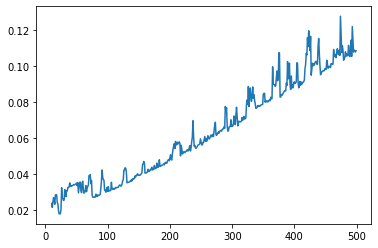

In [158]:
import timeit

N = 100

def get_prime_mask(N):
    numbers = np.arange(2,N+1)
    mask = np.ones(N+1-2,'bool')# Assuming every number to be prime.
    for i in range(2,N+1):
        j = i
        
        while i*j < N+1:
            mask[i*j-2] = False
            j+=1
    return mask

prime_1 = lambda: get_prime_mask(N)

print(timeit.timeit(prime_1, number = 1000))


def sie_of_era(N):
    mask = np.ones(N+1,'bool')
    numbers = np.arange(N+1)
    i = 2
    while i<N+1:
        # Mark all those at n*i-th steps which haven't been set to false, to be false
        non_primes = [j for j in range(2*i,N+1,i) if mask[j]]
        mask[non_primes] = False
        # Find the next number that has not been set to one
        #print(i)
        #print(numbers)
        new = np.where((mask == True)*(numbers>i)==True)
        #print(new)
        new = new[0]
        if not new.any():
            break
        i = new[0]
    return numbers[mask]

sie_of_era(100)
prime_2 = lambda:sie_of_era(100)
print(timeit.timeit(prime_2, number = 1000))


def opt_sie_of_era(N):
    numbers = np.arange(N+1)
    mask = np.ones(N+1,'bool')
    for i in range(2,int(np.sqrt(N))):
        if not mask[i]: continue
        for j in range(i**2,N+1,i):
            mask[j] = False
    return numbers[mask]

#n = [i for i in range(100,200)]
t = []
for n in range(10,500):
    prime_1 = lambda: get_prime_mask(n)
    t.append(timeit.timeit(prime_1, number = 1000))

t = np.array(t)
n = np.arange(10,500)
plt.plot(n,t)

prime_3 = lambda: opt_sie_of_era(100)
print(timeit.timeit(prime_3,number = 1000))

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

[[-1 -1 -1 ... -1  1 -1]
 [ 1 -1 -1 ... -1  1 -1]
 [ 1  1 -1 ...  1  1 -1]
 ...
 [-1  1  1 ... -1  1 -1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1 -1 ... -1  1  1]]
[[ -1  -1  -1 ...  -1   1  -1]
 [  0  -2  -2 ...  -2   2  -2]
 [  1  -1  -3 ...  -1   3  -3]
 ...
 [ 62 -40  34 ... -26  -4 -52]
 [ 61 -41  35 ... -25  -3 -51]
 [ 60 -42  34 ... -26  -2 -50]]


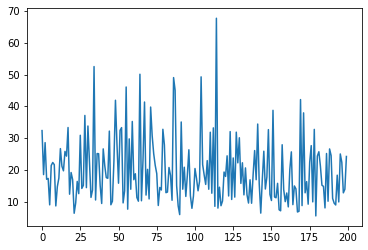

In [13]:
n_walkers = 1000
n_steps = 200
import numpy as np
walks = 2*np.random.randint(2,size = (n_walkers,n_steps))-1
print(walks)
walk_dists = walks.cumsum(axis = 0)
print(walk_dists)
x = np.sqrt(np.mean(walk_dists**2, axis = 0))
t = np.arange(n_steps)
plt.plot(t,x)

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  after removing the cwd from sys.path.


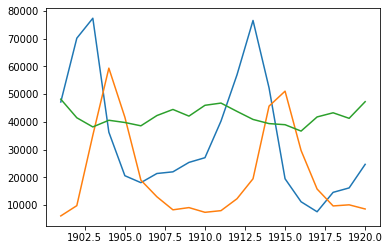

In [167]:
#! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
tags = ['year', 'hares', 'lynxes', 'carrots']

h = np.array([np.fromstring(i, sep = ' ') for i in open("populations.txt") if np.fromstring(i, sep = ' ').any()])

data = {}
for i, v in enumerate(h.T):
    data[tags[i]]=v

for tag in tags[1:]:
    plt.plot(data['year'][1:] ,data[tag][1:])